<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b></b>

# Проект: Анализ сервиса аренды самокатов GoFast.</div>

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b> </b>

**Плана работы**

1) Загрузить данные 

2) Проверьте наличие пропущенных значений и дубликатов в датафреймах

3) Описать и визуализировать общую информацию о пользователях и поездках

4) Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий( с подпиской и без)

5) Подсчитать выручку

6) Проверить гипотезы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
import math
from matplotlib import pyplot


#### Шаг 1. Загрузка данных

Прочитаем файлы

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

Выведем первые строки

In [3]:
print(data_users.head(10))
print(data_rides.head(10))
print(data_subscriptions.head(10))

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
5        6      Регина   25       Краснодар             ultra
6        7       Игорь   23            Омск             ultra
7        8        Юрий   23       Краснодар             ultra
8        9          Ян   21       Пятигорск             ultra
9       10     Валерий   18    Екатеринбург             ultra
   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28
5        1  2770.890808  16.650138  

In [4]:
print(data_users.info())
print(data_rides.info())
print(data_subscriptions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns)

# Промежуточный вывод
Прочитав файлы обноружил что в датасетак присутствуют id пользователей, их имена, возраст, город(по всей видимости где была сделага аренда), дата аренды, расстояние и продолжительность в минктах(очень странно описана 6.232113 минуты). Также есть информация о типе подписке и сколько за неё платят.

#### Шаг 2. Предобработка данных

Округлим duration

In [5]:
data_rides['duration'] = data_rides['duration'].apply(lambda x: math.ceil(x))

Проверим

In [6]:
print(data_rides['duration'])

0        26
1        16
2         7
3        19
4        27
         ..
18063    20
18064    22
18065    19
18066    17
18067    16
Name: duration, Length: 18068, dtype: int64


Всё получилось

Проверим какого типа данные в датасете data_rides

In [7]:
print(data_rides.dtypes)

user_id       int64
distance    float64
duration      int64
date         object
dtype: object


Какой-то странный 'object' исправим

In [8]:
data_rides['date'] = pd.to_datetime(data_rides['date'])
print(data_rides.dtypes)

user_id              int64
distance           float64
duration             int64
date        datetime64[ns]
dtype: object


Создадим новый столбец с месяцем аренды

In [9]:
data_rides['month_of_rent'] = data_rides['date'].dt.month
print(data_rides.head())

   user_id     distance  duration       date  month_of_rent
0        1  4409.919140        26 2021-01-01              1
1        1  2617.592153        16 2021-01-18              1
2        1   754.159807         7 2021-04-20              4
3        1  2694.783254        19 2021-08-11              8
4        1  4028.687306        27 2021-08-28              8


Ещё одно подтверждение что в Сибири живут суровые люди. 1-ое и 2-ое место это города Сибири и они арендовали в **ЯНВАРЕ САМОКАТ**

Проверим на дубликаты датасеты

In [10]:
print(data_users.duplicated().sum())
print(data_rides.duplicated().sum())
print(data_subscriptions.duplicated().sum())


31
0
0


В датасете "data_users" есть 31 дубликат. Удалим их.

In [11]:
data_users = data_users.drop_duplicates()

Проверим ещё раз на дубликаты

In [12]:
print(data_users.duplicated().sum())
print(data_rides.duplicated().sum())
print(data_subscriptions.duplicated().sum())

0
0
0


Отлично, дубликатов нет

Теперь проверим на пропущенные значения

In [13]:
print(data_users.isna().sum())
print(data_rides.isna().sum())
print(data_subscriptions.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id          0
distance         0
duration         0
date             0
month_of_rent    0
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Отлично заполнили, пропусков нет!

# Промежуточный вывод

Был исправлен тип данный в data_rides['date'] с помощью pd.to_datatime. Добавлен месяц аренды. Проверив на дубликаты в датасете data_users они были обнаружены и удалены. Пропусков не было обнаружено 

#### Шаг 3. Исследовательский анализ данных

Исследуем частоту встречаемости по городам

In [14]:
city = data_users['city'].value_counts()
print(city)

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


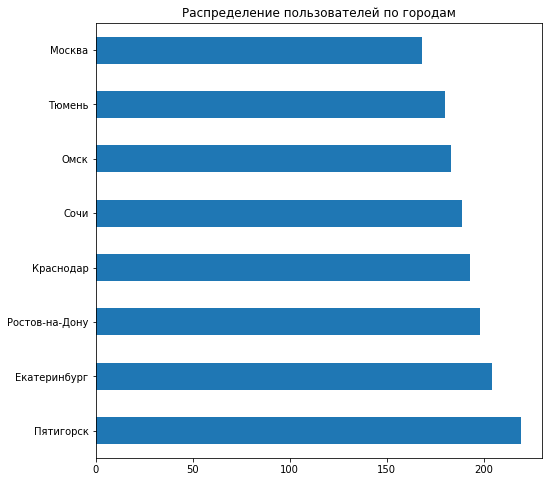

In [15]:
data_users['city'].value_counts().plot(
    kind = 'barh', 
    y = city,
    figsize=(8,8), 
    title = 'Распределение пользователей по городам');

Исследуем соотношение пользователей с подпиской и без подписки

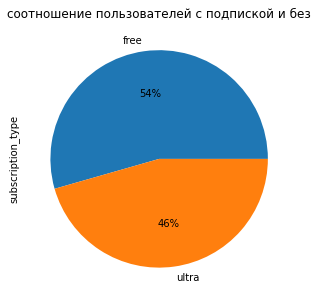

In [16]:
data_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = city,
    autopct = '%1.0f%%',
    figsize=(5,5), 
    title = 'соотношение пользователей с подпиской и без');

"Халявщиков" чуть больше. Дальше поймем оправдана ли эта экономия.

Теперь проверим какие возраста чаще пользуются прокатом

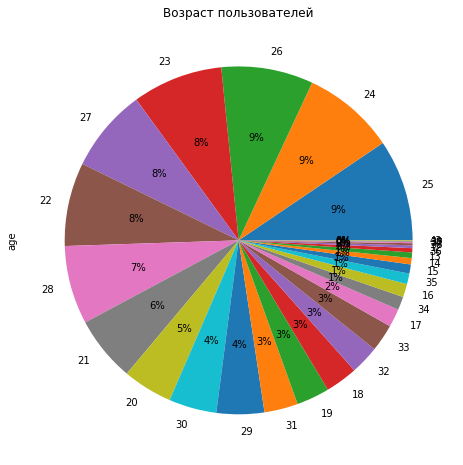

In [17]:
data_users['age'].value_counts().plot(
    kind = 'pie', 
    y = city,
    autopct = '%1.0f%%',
    figsize=(8,8), 
    title = 'Возраст пользователей');

Вроде работает, но как-то некрасиво... 

Попробуем изменить

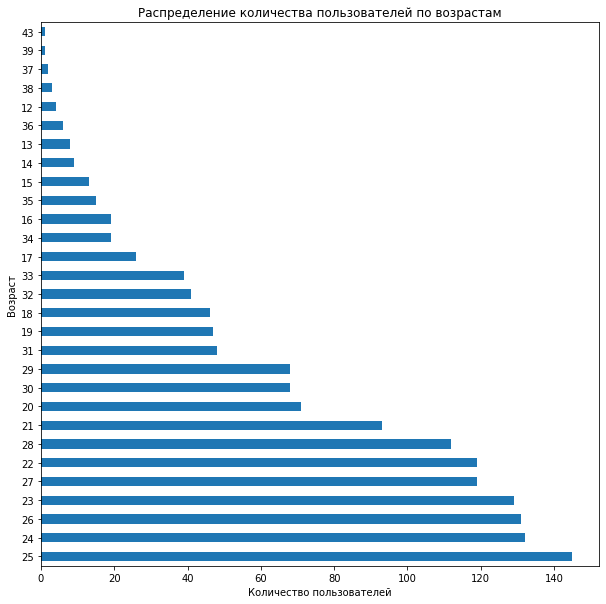

In [18]:
data_users['age'].value_counts().plot(
    kind='barh',
    figsize=(10, 10)
)

plt.xlabel('Количество пользователей')
plt.ylabel('Возраст')
plt.title('Распределение количества пользователей по возрастам')

plt.show()

Уже лучше и приятнее, но тренды последних лет это кружочки

Или это в Телеграмме?

Неважно, когда меньше углов информация кажется приятнее. Разделим людей на возрастные группы.

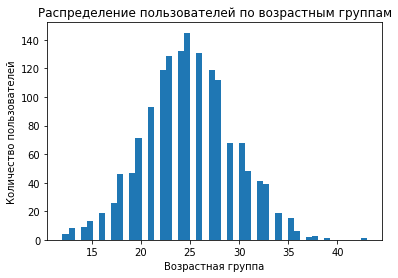

In [19]:
bins = [18, 25, 35, 60]  # Границы категорий возраста
labels = ['18-25', '25-35', '35+']  # Метки категорий возраста
data_users['age_group'] = pd.cut(data_users['age'], bins=bins, labels=labels, right=False)

# Подсчитываем количество пользователей в каждой категории возраста
age_count = data_users['age_group'].value_counts()


plt.hist(data_users['age'], bins=50, rwidth=1)

plt.xlabel('Возрастная группа')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрастным группам')

# Отображаем гистограмму
plt.show()

Теперь посотрим сколько на самокатах в среднем катались

In [20]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

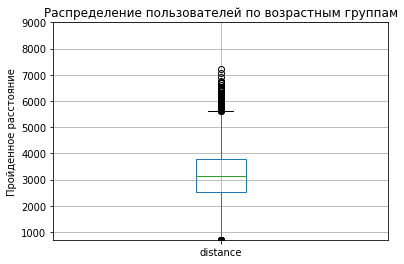

In [21]:
plt.ylim(700, 9000)
data_rides.boxplot('distance')
plt.xlabel('')
plt.ylabel('Пройденное расстояние')
plt.title('Распределение пользователей по возрастным группам')
plt.show()

Минимальная поездка была 855 метров, а средняя чуть более 3 км. Самый главный путешественник проехал 7.2км.

Теперь проверим длительность поездок

In [22]:
data_rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

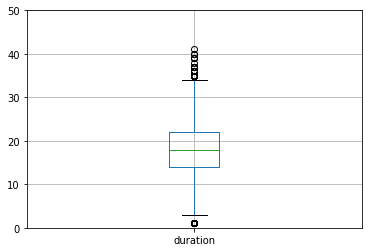

In [23]:
plt.ylim(0, 50)
data_rides.boxplot('duration')
plt.show()

Cреднее время составило 17 минут. Минимальное пол минуты(попробовал и слез возможно). А самый выносливый гонщик катался почти 41 минуты (Золотой ты мой во всех смыслах человек)

# Проммежуточные выводы

1) Была выяснена частота встречаемости городов в приложение( примерно одинаковое без больших перекосов). 

2) Выяснено кто чаще из возрастов пользуется самокатами(несколькими способами показано) 25-35 лет т.к у них уже есть деньги, но возможно ещё не накопили на машину или то самое поколение которое поддерживает шеринг экономику.

3) Показана средняя дистанция и время пользования самокатом( 3 км и 17 минут соответственно)



#### Шаг 4. Объединение данных

Начнём объединение датасетов

In [24]:
one_data = data_users.merge(data_rides)

In [25]:
one_data = one_data.merge(data_subscriptions)
one_data

,user_id,name,age,city,subscription_type,age_group,distance,duration,date,month_of_rent,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,18-25,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,18-25,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,18-25,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,18-25,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,18-25,4028.687306,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,25-35,3781.098080,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,25-35,2840.423057,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,25-35,3826.185507,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,25-35,2902.308661,17,2021-11-27,11,8,50,0


In [26]:
data_subscription_free = one_data.query("`subscription_type` == 'free'")
data_subscription_free 

,user_id,name,age,city,subscription_type,age_group,distance,duration,date,month_of_rent,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,18-25,2515.690719,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,18-25,846.932642,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,18-25,4004.434142,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,18-25,1205.911290,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,18-25,3047.379435,18,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,25-35,3781.098080,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,25-35,2840.423057,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,25-35,3826.185507,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,25-35,2902.308661,17,2021-11-27,11,8,50,0


In [27]:
data_subscription_ultra = one_data.query("`subscription_type` == 'ultra'")
data_subscription_ultra 

,user_id,name,age,city,subscription_type,age_group,distance,duration,date,month_of_rent,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,18-25,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,18-25,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,18-25,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,18-25,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,18-25,4028.687306,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,18-25,3973.046497,25,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,18-25,3288.702563,16,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,18-25,3076.159348,15,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,18-25,4707.845501,16,2021-10-17,10,6,0,199


Визуализируем для бесплатных пользователей

~~Проезжанное расстояние~~ Сколько проехали

In [28]:
data_subscription_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

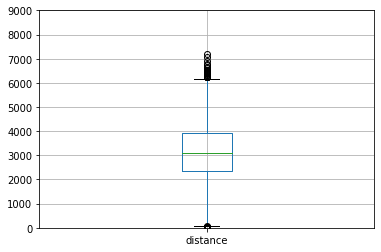

In [29]:
plt.ylim(0, 9000)
data_subscription_free.boxplot('distance')
plt.show()

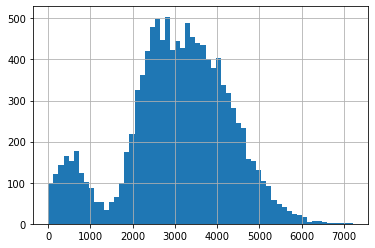

In [30]:
data_subscription_free['distance'].hist(bins=60)
plt.show()

Как видим в среднем проезжает 3км, минимум это 855метров, а максимум 7.2км

Теперь сколько аренда занимала времени

In [31]:
data_subscription_free['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

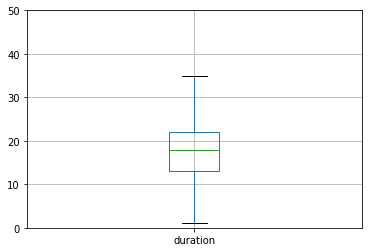

In [32]:
plt.ylim(0, 50)
data_subscription_free.boxplot('duration')
plt.show()

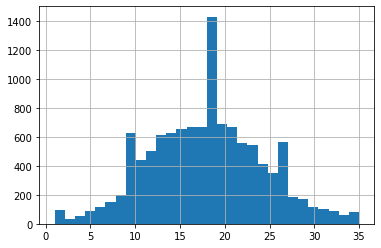

In [33]:
data_subscription_free['duration'].hist(bins=30)
plt.show()

Минимум составил полминуты, максимум почти 35 минут, а среднее почти 18 минут.

Теперь рассчитаем для людей с подпиской

In [34]:
data_subscription_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

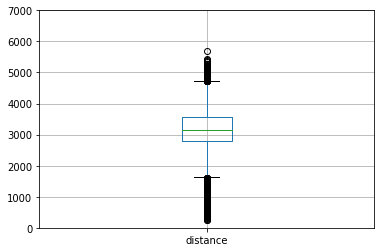

In [35]:
plt.ylim(0, 7000)
data_subscription_ultra.boxplot('distance')
plt.show()

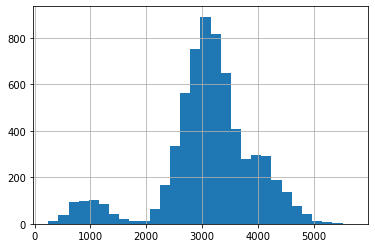

In [36]:
data_subscription_ultra['distance'].hist(bins=30)
plt.show()

Видим что в среднем за поездку проезжает 3 км, минимальная поездка 244 метра, а самая дальняя 5.7км

Теперь посмотрим сколько у людей с подпиской заняла по времени поездка

In [37]:
data_subscription_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

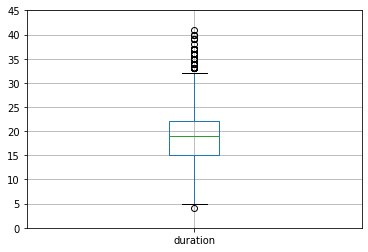

In [38]:
plt.ylim(0, 45)
data_subscription_ultra.boxplot('duration')
plt.show()

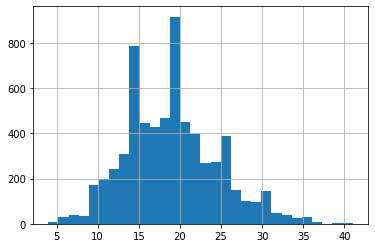

In [39]:
data_subscription_ultra['duration'].hist(bins=30)
plt.show()

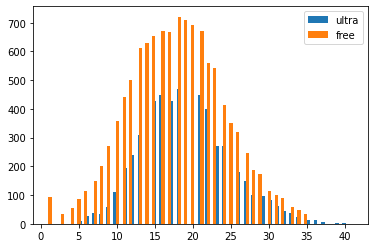

In [40]:
pyplot.hist(data_subscription_ultra['duration'], bins = 80, alpha=1, label='ultra')
pyplot.hist(data_subscription_free['duration'], bins = 80, alpha=1, label='free')
pyplot.legend(loc='upper right')
pyplot.show()

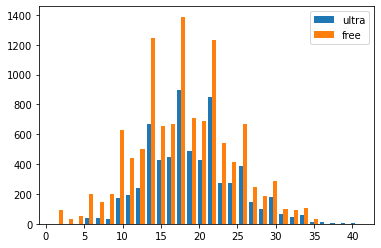

In [41]:
plt.hist([data_subscription_ultra['duration'],data_subscription_free['duration']], bins = 30, label=['ultra', 'free'])
plt.legend(loc='upper right')
plt.show()

В среднем поездка занимала 18 минут. Минимальная 3 минуты, а максимум почти 41 минута

# Промежуточные выводы

1) "Склеили" 3 таблички в 1 и выделили 2 таблицы( с подпиской и без)

2) Существует небольшая разница в аренде у людей с подпиской и без, а именно: 
    
    Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже до 7.2 км. Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км. Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

#### Шаг 5. Подсчёт выручки

Займёмся самым приятным, посчитаем чужые денюшки)))

In [42]:
total_data = pd.pivot_table(one_data,
                           index=['month_of_rent', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})

In [43]:
total_data.rename(columns = {'name' : 'count_tips'}, inplace = True)


In [44]:
total_data['duration'] = np.ceil(total_data['duration'])


In [45]:
total_data.sort_values(by='month_of_rent').head()


distance  duration  count_tips subscription_type
month_of_rent user_id                                                      
1             1         7027.511294      42.0           2             ultra
              1061     12637.249630      43.0           3              free
              1063      3276.362299      10.0           1              free
              1064      5297.324649      15.0           1              free
              1065     14547.099333      99.0           4              free

In [46]:
total_data.query('user_id == 22')


,,distance,duration,count_tips,subscription_type
month_of_rent,user_id,,,,
1,22,3058.692225,13.0,1,ultra
5,22,3024.124502,20.0,1,ultra
6,22,3323.771283,25.0,1,ultra
7,22,3543.169677,27.0,1,ultra
9,22,3238.524231,27.0,1,ultra


Посчитаем выручку

In [47]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['count_tips']
    else:
        return 'Not such sub'

In [48]:
total_data['revenue_per_month'] = total_data.apply(revenue, axis=1)


In [49]:
total_data['revenue_per_month'].head()


month_of_rent  user_id
1              1          451.0
               3          277.0
               5          277.0
               7          367.0
               12         397.0
Name: revenue_per_month, dtype: float64

In [50]:
total_data.query('user_id == 22')

,,distance,duration,count_tips,subscription_type,revenue_per_month
month_of_rent,user_id,,,,,
1,22,3058.692225,13.0,1,ultra,277.0
5,22,3024.124502,20.0,1,ultra,319.0
6,22,3323.771283,25.0,1,ultra,349.0
7,22,3543.169677,27.0,1,ultra,361.0
9,22,3238.524231,27.0,1,ultra,361.0


In [51]:
# Код ревьюера
total_data.groupby('subscription_type')['revenue_per_month'].mean()

subscription_type
free     328.641365
ultra    362.792191
Name: revenue_per_month, dtype: float64

# Промежуточный вывод

Создали новый датафрейм с агрегированными данными (total_data) на основе датафрейма с объединенными данными (one_data).

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

#### Шаг 6. Проверка гипотез

1. Проверим гипотезу о том что пользователи с подпиской проводят больше времени

H_0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free

H_1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free

In [52]:
ultra = data_subscription_ultra['duration'] 

free = data_subscription_free['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = 0.01

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


**Вывод**

    Проверили гипотезу, отвергли гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free.



2. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

H_0: Расстояние (distance) пользователей на подписке ultra = 3130 метров

H_1: Расстояние (distance) пользователей на подписке ultra < 3130 метров

In [53]:
ultra_dist = data_subscription_ultra['distance'] 

interested_value = 3130.0

alpha = 0.01

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative = 'greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


**Вывод**

    Проверили гипотезу, и мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров.




3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

H_0: Выручка (revenue_per_month) пользователей на подписке ultra = выручка (revenue_per_month) пользователей на подписке free

H_1: Выручка (revenue_per_month) пользователей на подписке ultra > выручка (revenue_per_month) пользователей на подписке free

In [54]:
ultra_per_mnth = total_data.loc[total_data.subscription_type == 'ultra', 'revenue_per_month'] 

free_per_mnth = total_data.loc[total_data.subscription_type == 'free', 'revenue_per_month'] 


results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha = 0.01

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод**

    Проверили гипотезу, соответственно, мы можем утверждать, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free

4.

Ответ: Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок. Гипотезы будут сформулированы так:

H0 : μ1 = μ2

H1 : μ1 != μ2

где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

# Общий вывод

1) Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.

2) Дальше проверили данные на пропуски, их не оказалось ни в одной таблице. Были дубликаты в датафрейме data_users(всего 31). Их удалили. Поменяли тип данных у столбца date из датафрейма data_riders к типу даты. Также добавили столбец month с номером месяца.

3) Провели исследовательский анализ данных: Вывели, что количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей(14%). Меньше всего пользователей в Москве - 168(12%). Пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%. Возраст пользователей укладывается в промежуток от 20 до 30 лет В основном пользователи проезжают от 2.5 км до 4 км. Есть рекордсмены с 7.2 км.Чаще всего длительность поездки состовляет 13 - 22 минут

4) Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма: Для пользователей с ultra подпиской, для пользователей с free подпиской 

5) Далее визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа. Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км. Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км. Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм total_data. Добавили в датафрейм total_data столбец с помесячной выручкой revenue_per_month.

6) Проверили гипотезы: 1. Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе. Отвергли нулевую гипотезу
2. Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку Не удалось отвергнуть нулевую гипотезу
3. Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки Отвергли нулевую гипотезу

7) Подписчики являются более "выгодными" чем люди без подписки